# <center> Matthew Kearney - CS 559 Homework 4 - Logistic Regression <center>

### sklearn.linear_model.LogisticRegression : ** 
 ** Note that regularization is applied by default. It can handle both dense and sparse input. **
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [60]:
from sklearn import datasets
import pandas as pd
import numpy as np

X, y, centers = datasets.make_blobs(n_samples = 400, n_features = 5, 
            centers=4, cluster_std = 2, random_state=100, return_centers=True)

DF_y= pd.DataFrame(X)
DF_y['y']= y

### Preprocessing, EDA Visualization

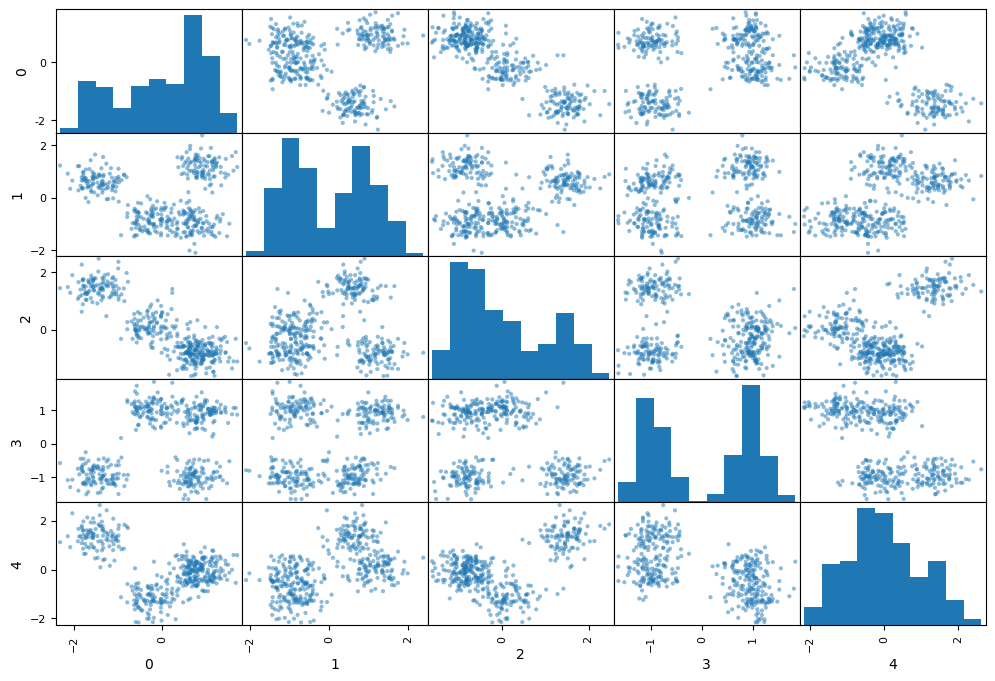

In [61]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_s = scaler.fit_transform(X)
## y is a discrete target, so we don't want to touch this

DF = pd.DataFrame(X_s)

scatter_matrix(DF, figsize=(12,8))
plt.show()

With the standardized data, we can see that the mean is around 0 and deviates to (about) [-2, 2], meaning we've effectively standardized the data as necessary

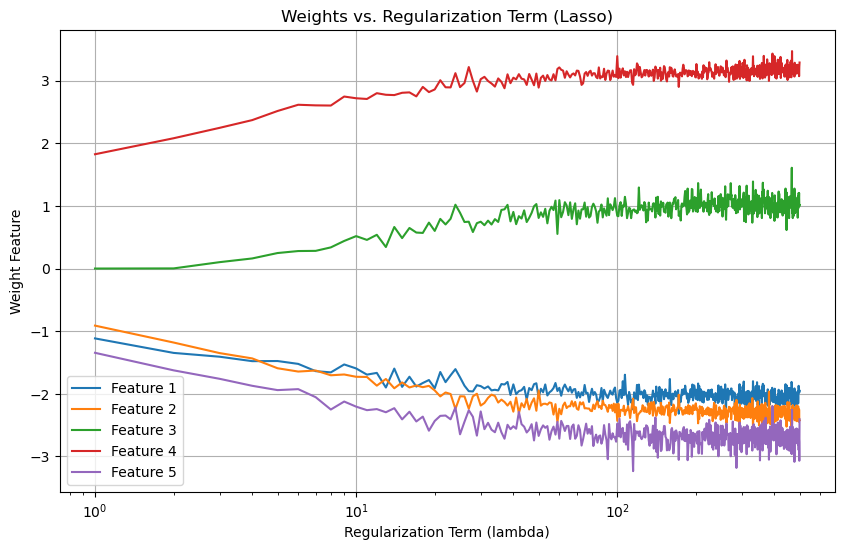

In [62]:
from sklearn.linear_model import LogisticRegression

##comment out
import warnings
warnings.filterwarnings('ignore')

lambdas=500
C_vals = range(1,lambdas)

W = []

for c in C_vals: 
    clf = LogisticRegression(penalty='l1', solver='saga', C=c)
    clf.fit(X_s, y)
    w, w0 = clf.coef_, clf.intercept_
    W.append(w[0])

W = np.array(W)

plt.figure(figsize=(10, 6))

for i in range(W.shape[1]):
    # plt.subplot(2, 3, i+1)
    plt.plot(C_vals, W[:, i], label=f'Feature {i+1}')

plt.xlabel('Regularization Term (lambda)')
plt.ylabel(f'Weight Feature')
plt.title(f'Weights vs. Regularization Term (Lasso)')
plt.xscale('log')  # Use logarithmic scale for lambda
plt.grid(True)
plt.legend()
plt.show()


### Feature importance: 
https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model
 > cottontails

In [63]:
from sklearn.inspection import permutation_importance

model = LogisticRegression(penalty='l1', solver='saga', C=1).fit(X_s,y)
model_fi = permutation_importance(model, X_s, y)
feature_importance = model_fi['importances']


Notably, we have found the feature importances by class from the above matrix using the permutation_importance method. We have four classes, and we can find the most important feature by taking the argmax of each class. We can be certain that we are finding the most important feature in each class as we are taking the highest value of the weight coefficients for different features, as this feature has the highest correlation to the target.



In [64]:
c = 1
for i in feature_importance:
    if c > 4: 
        break
    x = np.argmax(i)
    print("The most important feature for class " + str(c) + " is " + str(x))
    c=c+1

The most important feature for class 1 is 2
The most important feature for class 2 is 1
The most important feature for class 3 is 3
The most important feature for class 4 is 0


### Ridge approximation, penalty = 'l2'

[[-0.95663243 -1.147807    0.51145518  1.57053549 -1.35558181]
 [-1.11623175 -1.30003305  0.56705718  1.78178905 -1.514267  ]
 [-1.21343101 -1.39445889  0.60122221  1.91173037 -1.60950286]
 ...
 [-1.95529866 -2.39288837  1.10334144  3.17144138 -2.46535778]
 [-2.0513824  -2.34772358  0.98426952  3.18630361 -2.67270562]
 [-1.92164274 -2.40031169  1.15743745  3.17299687 -2.5997068 ]]


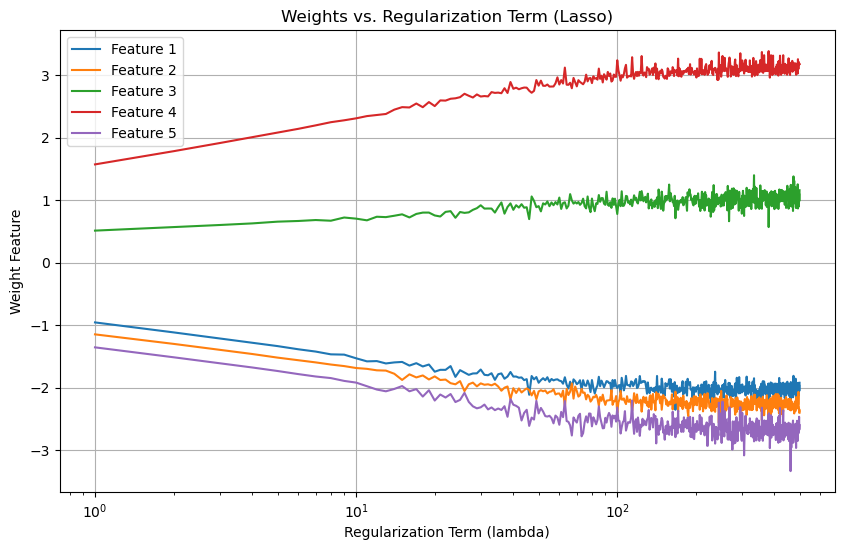

In [65]:
W_r = []

C_vals=range(1,lambdas)
for c in C_vals:
    r1 =LogisticRegression(penalty='l2', solver='saga', C=c)
    r1.fit(X_s,y)
    w, w0 = r1.coef_, r1.intercept_
    W_r.append(w[0])

W_r = np.array(W_r)
print(W_r)

plt.figure(figsize=(10, 6))

for i in range(W_r.shape[1]):
    # plt.subplot(2, 3, i+1)
    plt.plot(C_vals, W_r[:, i], label=f'Feature {i+1}')

plt.xlabel('Regularization Term (lambda)')
plt.ylabel(f'Weight Feature')
plt.title(f'Weights vs. Regularization Term (Ridge ~ q=2)')
plt.xscale('log')  # Use logarithmic scale for lambda
plt.grid(True)
plt.legend()
plt.show()
